In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import time
import os
import pickle

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
matfile = '/Users/bogao/DataFiles/new landscape/data/selected_gene_mat.pkl'
labelfile = '/Users/bogao/DataFiles/new landscape/data/all_bands_label.pkl'
with open(matfile, 'rb') as fmat, open(labelfile, 'rb') as flab:
    data = pickle.load(fmat)
    data = np.array(data)
    labels = pickle.load(flab)

dlabelfile = '/Users/bogao/DataFiles/new landscape/data/all_bands_disease_label.pkl'
with open(dlabelfile, 'rb') as fi:
    disease_labels = pickle.load(fi)

censusfile = '/Users/bogao/DataFiles/new landscape/files/Census_allThu Jan 16 08_07_54 2020.tsv'
cenesus_genes = pd.read_csv(censusfile, sep='\t')



In [6]:
data.shape

(42820, 3029)

In [10]:
disease_labels.shape

(42820,)

Brain

In [15]:
RS = 1234
dBrain = data[labels == 'Brain']

In [12]:
dBrain_label = disease_labels[labels == 'Brain']
dBrain_label = pd.Series(dBrain_label).str[:3].values

In [13]:
dBrain.shape

(2808, 3029)

In [14]:
dBrain_label.shape

(2808,)

In [15]:
unique_labels, unique_counts = np.unique(dBrain_label,return_counts=True)
unique_labels = unique_labels[unique_counts>10]
dBrain = dBrain[np.isin(dBrain_label, unique_labels)]
dBrain_label = dBrain_label[np.isin(dBrain_label, unique_labels)]

In [16]:
# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dBrain)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.373319149017334 seconds
Cumulative explained variation for 50 principal components: 0.9116019574497769


In [17]:
# TSNE
time_start = time.time()
brain_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 23.47897982597351 seconds


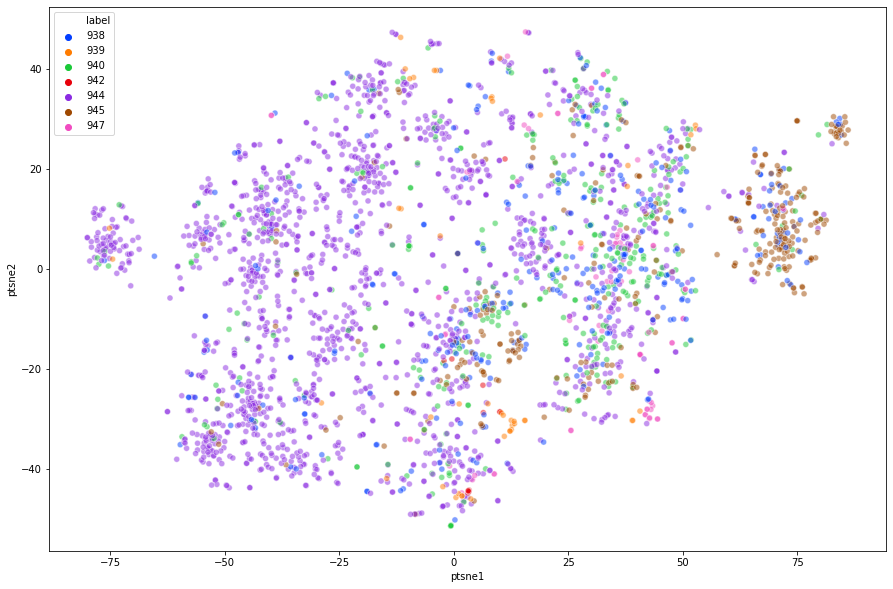

In [18]:
# plot
df = pd.DataFrame(brain_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = dBrain_label
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(dBrain_label))),
    data=df,
    legend="full",
    alpha=0.5
)

In [16]:
dBrain_sum = np.sum(dBrain, axis=0)

In [22]:
dBrain_sum.shape

(3029,)

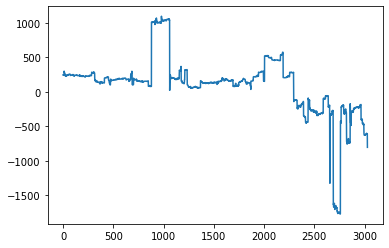

In [23]:
sns.lineplot(range(3029),dBrain_sum)

In [8]:
amp_genes = pd.read_csv('/Users/bogao/DataFiles/Data/genome/high_amp_genes.tsv', sep='\t')

In [17]:
amp_genes = amp_genes.assign(brain=dBrain_sum[:2294])

In [9]:
del_genes = pd.read_csv('/Users/bogao/DataFiles/Data/genome/high_del_genes.tsv', sep='\t')

In [18]:
del_genes = del_genes.assign(brain=dBrain_sum[2294:])

In [19]:
brain_amps = amp_genes[amp_genes['brain']>400].sort_values('band')

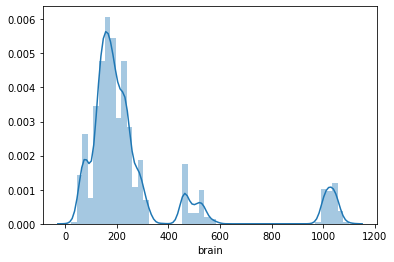

In [60]:
sns.distplot(amp_genes['brain'])

In [65]:
brain_amps

,gene_id,name,chr,start,end,symbol,band,brain
917,ENSG00000185811,p12.2,7,50304068,50405101,IKZF1,7p12.2,988.499736
916,ENSG00000164500,p12.2,7,50096036,50159830,SPATA48,7p12.2,989.619821
915,ENSG00000042813,p12.2,7,49850421,50121329,ZPBP,7p12.2,992.288096
914,ENSG00000188730,p12.2,7,49773638,49921950,VWC2,7p12.2,979.100559
880,ENSG00000255690,p14.3,7,28953358,28958330,TRIL,7p14.3,1013.516061
...,...,...,...,...,...,...,...,...
1024,ENSG00000179144,q36.1,7,150514872,150521073,GIMAP7,7q36.1,1038.143000
1025,ENSG00000133574,q36.1,7,150567369,150573953,GIMAP4,7q36.1,1030.457300
1026,ENSG00000133561,q36.1,7,150625375,150632648,GIMAP6,7q36.1,1038.937400
1013,ENSG00000197558,q36.1,7,149776042,149833979,SSPO,7q36.1,1048.839292


In [67]:
np.unique(brain_amps['chr'])

array([7])

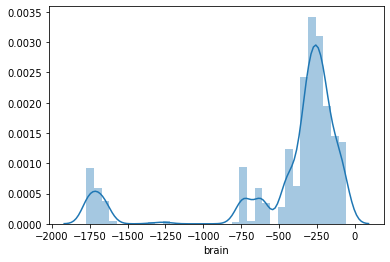

In [68]:
sns.distplot(del_genes['brain'])

In [20]:
brain_dels = del_genes[del_genes['brain'] < -550].sort_values('band')

In [73]:
np.unique(brain_dels['chr'])

array([10])

In [10]:
amp_genes

,gene_id,name,chr,start,end,symbol,band
0,ENSG00000116151,p36.32,1,2321253,2391707,MORN1,1p36.32
1,ENSG00000157916,p36.32,1,2391775,2405442,RER1,1p36.32
2,ENSG00000157911,p36.32,1,2403964,2413797,PEX10,1p36.32
3,ENSG00000149527,p36.32,1,2425980,2505532,PLCH2,1p36.32
4,ENSG00000157881,p36.32,1,2508537,2526611,PANK4,1p36.32
...,...,...,...,...,...,...,...
2289,ENSG00000206069,q11.23,22,24934954,24946695,TMEM211,22q11.23
2290,ENSG00000197077,q11.23,22,24952730,25197448,KIAA1671,22q11.23
2291,ENSG00000100053,q11.23,22,25199858,25207359,CRYBB3,22q11.23
2292,ENSG00000244752,q11.23,22,25212564,25231870,CRYBB2,22q11.23


In [21]:
cenesus_genes[cenesus_genes['Gene Symbol'].isin(brain_amps['symbol'].values)]

,Gene Symbol,Name,Entrez GeneId,Genome Location,Tier,Hallmark,Chr Band,Somatic,Germline,Tumour Types(Somatic),Tumour Types(Germline),Cancer Syndrome,Tissue Type,Molecular Genetics,Role in Cancer,Mutation Types,Translocation Partner,Other Germline Mut,Other Syndrome,Synonyms
13,AKAP9,A kinase (PRKA) anchor protein (yotiao) 9,10142.0,7:91940867-92110673,2,NaN,21.20,yes,NaN,papillary thyroid,NaN,NaN,E,Dom,fusion,T,BRAF,NaN,NaN,"10142,AKAP350,AKAP450,AKAP9,CG-NAP,ENSG0000012..."
81,CALR,calreticulin,811.0,19:12938607-12944489,1,Yes,13.13,yes,NaN,"MPN, MDS",NaN,NaN,L,Dom,oncogene,"F, Mis",NaN,NaN,NaN,"811,CALR,CRT,ENSG00000179218.13,FLJ26680,P2779..."
116,CDK6,cyclin-dependent kinase 6,1021.0,7:92604921-92833917,1,Yes,21.20,yes,NaN,ALL,NaN,NaN,L,Dom,"oncogene, fusion",T,MLLT10,NaN,NaN,"1021,CDK6,ENSG00000105810.9,PLSTIRE,Q00534"
223,EZH2,enhancer of zeste homolog 2,2146.0,7:148807385-148884278,1,NaN,36.10,yes,NaN,DLBCL,NaN,NaN,L,Dom,"oncogene, TSG",Mis,NaN,NaN,NaN,"2146,ENSG00000106462.10,ENX-1,EZH1,EZH2,KMT6,K..."
254,FKBP9,FK506 binding protein 9,11328.0,7:32957404-33006930,2,NaN,14.30,yes,NaN,glioma,NaN,NaN,O,NaN,NaN,Mis,NaN,NaN,NaN,"11328,ENSG00000122642.10,FKBP60,FKBP63,FKBP9,O..."
321,IKZF1,IKAROS family zinc finger 1,10320.0,7:50304669-50405101,1,NaN,12.20,yes,NaN,"ALL, DLBCL",NaN,NaN,L,Dom/Rec,"TSG, fusion","D,T",BCL6,NaN,NaN,"10320,ENSG00000185811.18,Hs.54452,IKAROS,IKZF1..."
353,KMT2C,lysine (K)-specific methyltransferase 2C,58508.0,7:152134925-152436005,1,Yes,36.10,yes,NaN,medulloblastoma,NaN,NaN,O,Rec,TSG,N,NaN,NaN,NaN,"58508,ENSG00000055609.17,HALR,KIAA1506,KMT2C,M..."
376,LYL1,lymphoblastic leukemia derived sequence 1,4066.0,19:13099033-13102867,1,NaN,13.13,yes,NaN,T-ALL,NaN,NaN,L,Dom,"oncogene, fusion",T,TRB,NaN,NaN,"4066,ENSG00000104903.4,LYL1,P12980,bHLHa18"
380,MAFB,v-maf musculoaponeurotic fibrosarcoma oncogene...,9935.0,20:40685848-40689240,1,NaN,12.00,yes,NaN,MM,NaN,NaN,L,Dom,"oncogene, fusion",T,IGH,NaN,NaN,"9935,ENSG00000204103.3,KRML,MAFB,Q9Y5Q3"
398,MET,met proto-oncogene (hepatocyte growth factor r...,4233.0,7:116672405-116796342,1,NaN,31.20,yes,NaN,"papillary renal, head-neck squamous cell",papillary renal,familial papillary renal cancer,E,Dom,oncogene,Mis,NaN,NaN,NaN,"4233,DFNB97,ENSG00000105976.14,HGFR,MET,P08581..."


In [22]:
cenesus_genes[cenesus_genes['Gene Symbol'].isin(brain_dels['symbol'].values)]

,Gene Symbol,Name,Entrez GeneId,Genome Location,Tier,Hallmark,Chr Band,Somatic,Germline,Tumour Types(Somatic),Tumour Types(Germline),Cancer Syndrome,Tissue Type,Molecular Genetics,Role in Cancer,Mutation Types,Translocation Partner,Other Germline Mut,Other Syndrome,Synonyms
94,CCDC6,coiled-coil domain containing 6,8030.0,10:59788763-59906656,1,Yes,21.20,yes,NaN,"papillary thyroid, CML, NSCLC",NaN,NaN,E,Dom,"TSG, fusion",T,"RET, PDGFRB",NaN,NaN,"8030,CCDC6,D10S170,ENSG00000108091.10,H4,PTC,Q..."
122,CEBPA,"CCAAT/enhancer binding protein (C/EBP), alpha",1050.0,19:33299934-33302564,1,NaN,13.11,yes,NaN,"AML, MDS",NaN,NaN,L,Dom,TSG,"Mis, N, F",NaN,NaN,NaN,"1050,C/EBP-alpha,CEBP,CEBPA,ENSG00000245848.2,..."
123,CEP89,centrosomal protein 89kDa,84902.0,19:32875925-32971963,2,NaN,13.11,yes,NaN,Spitzoid tumour,NaN,NaN,E,Dom,fusion,T,BRAF,NaN,NaN,"84902,CCDC123,CEP89,ENSG00000121289.17,FLJ1464..."
145,CPEB3,cytoplasmic polyadenylation element binding pr...,22849.0,10:92048642-92243279,2,NaN,23.32,yes,NaN,lung cancer,NaN,NaN,E,NaN,TSG,D,NaN,NaN,NaN,"22849,CPEB3,ENSG00000107864.14,KIAA0940,Q8NE35"
181,DICER1,"dicer 1, ribonuclease type III",23405.0,14:95086228-95158010,1,Yes,32.13,yes,yes,"sex cord-stromal tumour, TGCT, embryonal rhabd...",pleuropulmonary blastoma,familial pleuropulmonary blastoma or DICER1 sy...,"E, M, O",Rec,TSG,"Mis, F, N",NaN,NaN,NaN,"23405,DICER1,Dicer,ENSG00000100697.14,HERNA,K1..."
261,FOXA1,forkhead box A1,3169.0,14:37589984-37595034,1,Yes,21.10,yes,NaN,"breast, prostate",NaN,NaN,E,Dom,oncogene,"Mis, F",NaN,NaN,NaN,"3169,ENSG00000129514.5,FOXA1,HNF3A,P55317"
350,KLF6,Kruppel-like factor 6,1316.0,10:3775996-3785275,1,NaN,15.20,yes,NaN,"prostate, glioma",NaN,NaN,"E, O",Rec,TSG,"Mis, N",NaN,NaN,NaN,"1316,BCD1,COPEB,CPBP,ENSG00000067082.14,GBF,KL..."
375,LSM14A,"LSM14A, SCD6 homolog A (S. cerevisiae)",26065.0,19:34172566-34229515,2,NaN,13.11,yes,NaN,Spitzoid tumour,NaN,NaN,E,Dom,fusion,T,BRAF,NaN,NaN,"26065,C19orf13,DKFZP434D1335,ENSG00000257103.8..."
652,TCL1A,T-cell leukemia/lymphoma 1A,8115.0,14:95709968-95714196,1,Yes,32.13,yes,NaN,T-CLL,NaN,NaN,L,Dom,"oncogene, fusion",T,TRA,NaN,NaN,"8115,ENSG00000100721.10,P56279,TCL1,TCL1A"


Ovary

In [23]:
RS = 1234
dOvary = data[labels == 'Ovary']

dOvary_label = disease_labels[labels == 'Ovary']

dOvary = dOvary[dOvary_label != 'None']
dOvary_label = dOvary_label[dOvary_label != 'None']
dOvary_label = pd.Series(dOvary_label).str[:3].values

unique_labels, unique_counts = np.unique(dOvary_label,return_counts=True)
unique_labels = unique_labels[unique_counts>10]
dOvary = dOvary[np.isin(dOvary_label, unique_labels)]
dOvary_label = dOvary_label[np.isin(dOvary_label, unique_labels)]

In [24]:
# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dOvary)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.29767704010009766 seconds
Cumulative explained variation for 50 principal components: 0.8450112650309437


In [25]:
# TSNE
time_start = time.time()
ovary_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 20.113850116729736 seconds


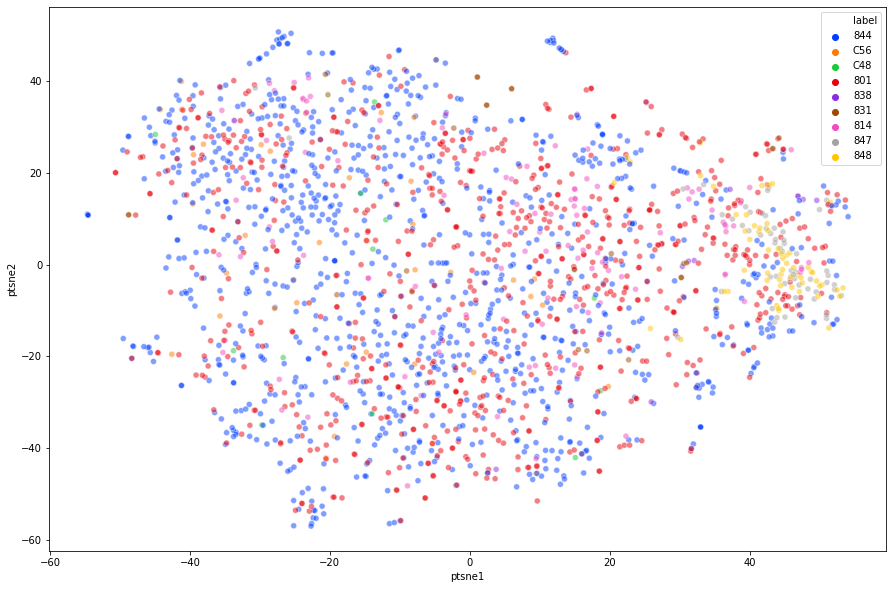

In [26]:
# plot
df = pd.DataFrame(ovary_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = dOvary_label
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(dOvary_label))),
    data=df,
    legend="full",
    alpha=0.5
)

In [27]:
dOvary_sum = np.sum(dOvary, axis=0)

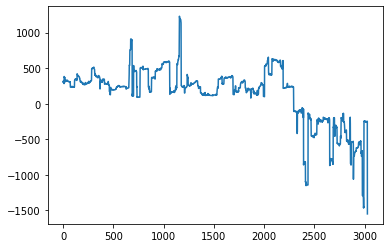

In [29]:
sns.lineplot(range(3029), dOvary_sum)

In [30]:
amp_genes = amp_genes.assign(ovary=dOvary_sum[:2294])

In [31]:
del_genes = del_genes.assign(ovary=dOvary_sum[2294:])

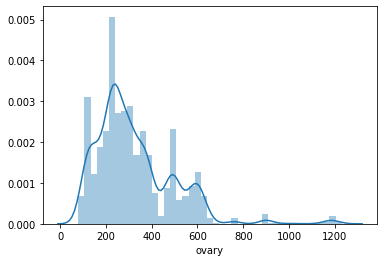

In [32]:
sns.distplot(amp_genes['ovary'])

In [33]:
ovary_amps = amp_genes[amp_genes['ovary']>400].sort_values('band')

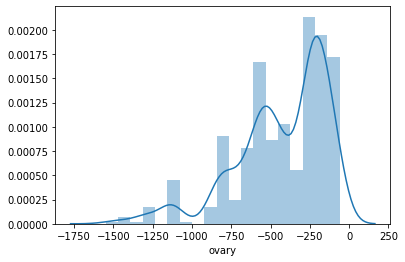

In [34]:
sns.distplot(del_genes['ovary'])

In [38]:
ovary_dels = del_genes[del_genes['ovary']<-350].sort_values('band')

In [36]:
cenesus_genes[cenesus_genes['Gene Symbol'].isin(ovary_amps['symbol'].values)]

,Gene Symbol,Name,Entrez GeneId,Genome Location,Tier,Hallmark,Chr Band,Somatic,Germline,Tumour Types(Somatic),Tumour Types(Germline),Cancer Syndrome,Tissue Type,Molecular Genetics,Role in Cancer,Mutation Types,Translocation Partner,Other Germline Mut,Other Syndrome,Synonyms
3,ABL2,"c-abl oncogene 2, non-receptor tyrosine kinase",27.0,1:179099327-179229601,1,NaN,25.20,yes,NaN,AML,NaN,NaN,L,Dom,"oncogene, fusion",T,ETV6,NaN,NaN,"27,ABL2,ABLL,ARG,ENSG00000143322.19,P42684"
13,AKAP9,A kinase (PRKA) anchor protein (yotiao) 9,10142.0,7:91940867-92110673,2,NaN,21.20,yes,NaN,papillary thyroid,NaN,NaN,E,Dom,fusion,T,BRAF,NaN,NaN,"10142,AKAP350,AKAP450,AKAP9,CG-NAP,ENSG0000012..."
81,CALR,calreticulin,811.0,19:12938607-12944489,1,Yes,13.13,yes,NaN,"MPN, MDS",NaN,NaN,L,Dom,oncogene,"F, Mis",NaN,NaN,NaN,"811,CALR,CRT,ENSG00000179218.13,FLJ26680,P2779..."
116,CDK6,cyclin-dependent kinase 6,1021.0,7:92604921-92833917,1,Yes,21.20,yes,NaN,ALL,NaN,NaN,L,Dom,"oncogene, fusion",T,MLLT10,NaN,NaN,"1021,CDK6,ENSG00000105810.9,PLSTIRE,Q00534"
156,CSMD3,CUB and Sushi multiple domains 3,114788.0,8:112222928-113437099,2,NaN,23.30,yes,NaN,"ovarian cancer, oral SCC, lung cancer",NaN,NaN,E,NaN,TSG,"Mis, N",NaN,NaN,NaN,"114788,CSMD3,ENSG00000164796.17,Q7Z407"
223,EZH2,enhancer of zeste homolog 2,2146.0,7:148807385-148884278,1,NaN,36.10,yes,NaN,DLBCL,NaN,NaN,L,Dom,"oncogene, TSG",Mis,NaN,NaN,NaN,"2146,ENSG00000106462.10,ENX-1,EZH1,EZH2,KMT6,K..."
226,FAM135B,family with sequence similarity 135 member B,51059.0,8:138130023-138496822,2,NaN,24.23,yes,NaN,SCLC,NaN,NaN,E,NaN,NaN,Mis,NaN,NaN,NaN,"51059,C8ORFK32,ENSG00000147724.11,FAM135B,Q49AJ0"
276,GMPS,guanine monphosphate synthetase,8833.0,3:155870536-155944026,2,NaN,25.31,yes,NaN,AML,NaN,NaN,L,Dom,fusion,T,KMT2A,NaN,NaN,"8833,ENSG00000163655.15,GATD7,GMPS,P49915"
325,IL7R,interleukin 7 receptor,3575.0,5:35856849-35879603,1,NaN,13.20,yes,NaN,"ALL, ETP ALL",NaN,NaN,L,Dom,oncogene,"Mis, O",NaN,yes,Severe combined immune deficiency,"3575,CD127,ENSG00000168685.14,IL7R,IL7RA,P16871"
353,KMT2C,lysine (K)-specific methyltransferase 2C,58508.0,7:152134925-152436005,1,Yes,36.10,yes,NaN,medulloblastoma,NaN,NaN,O,Rec,TSG,N,NaN,NaN,NaN,"58508,ENSG00000055609.17,HALR,KIAA1506,KMT2C,M..."


In [39]:
cenesus_genes[cenesus_genes['Gene Symbol'].isin(ovary_dels['symbol'].values)]

,Gene Symbol,Name,Entrez GeneId,Genome Location,Tier,Hallmark,Chr Band,Somatic,Germline,Tumour Types(Somatic),Tumour Types(Germline),Cancer Syndrome,Tissue Type,Molecular Genetics,Role in Cancer,Mutation Types,Translocation Partner,Other Germline Mut,Other Syndrome,Synonyms
75,BRIP1,BRCA1 interacting protein C-terminal helicase 1,83990.0,17:61681266-61863521,1,Yes,23.20,NaN,yes,NaN,"AML, leukaemia, breast","Fanconi anaemia J, breast cancer susceptiblity","L, E",Rec,TSG,"F, N, Mis",NaN,NaN,NaN,"83990,BACH1,BRIP1,ENSG00000136492.8,FANCJ,OF,Q..."
131,CIITA,"class II, major histocompatibility complex, tr...",4261.0,16:10877198-10924983,1,Yes,13.13,yes,NaN,"PMBL, Hodgkin lymphoma",NaN,NaN,L,Dom,"TSG, fusion",T,"C15orf55, CD274, PDCD1LG2, RALGDS, RUNDC2A, RM...",NaN,NaN,"4261,C2TA,CIITA,ENSG00000179583.19,MHC2TA,NLRA"
134,CLTC,"clathrin, heavy polypeptide (Hc)",1213.0,17:59619689-59696956,1,Yes,23.10,yes,NaN,"ALCL, renal",NaN,NaN,L,Dom,"TSG, fusion",T,"ALK, TFE3",NaN,NaN,"1213,CLTC,CLTCL2,ENSG00000141367.11,Hc"
145,CPEB3,cytoplasmic polyadenylation element binding pr...,22849.0,10:92048642-92243279,2,NaN,23.32,yes,NaN,lung cancer,NaN,NaN,E,NaN,TSG,D,NaN,NaN,NaN,"22849,CPEB3,ENSG00000107864.14,KIAA0940,Q8NE35"
181,DICER1,"dicer 1, ribonuclease type III",23405.0,14:95086228-95158010,1,Yes,32.13,yes,yes,"sex cord-stromal tumour, TGCT, embryonal rhabd...",pleuropulmonary blastoma,familial pleuropulmonary blastoma or DICER1 sy...,"E, M, O",Rec,TSG,"Mis, F, N",NaN,NaN,NaN,"23405,DICER1,Dicer,ENSG00000100697.14,HERNA,K1..."
187,EBF1,early B-cell factor 1,1879.0,5:158695920-159099761,1,Yes,33.30,yes,NaN,lipoma,NaN,NaN,M,Dom,"TSG, fusion",T,HMGA2,NaN,NaN,"1879,COE1,EBF,EBF1,ENSG00000164330.16,OLF1,Q9UH73"
261,FOXA1,forkhead box A1,3169.0,14:37589984-37595034,1,Yes,21.10,yes,NaN,"breast, prostate",NaN,NaN,E,Dom,oncogene,"Mis, F",NaN,NaN,NaN,"3169,ENSG00000129514.5,FOXA1,HNF3A,P55317"
330,ITK,IL2-inducible T-cell kinase,3702.0,5:157180826-157255191,1,NaN,33.30,yes,NaN,peripheral T-cell lymphoma,NaN,NaN,L,Dom,fusion,T,SYK,NaN,NaN,"3702,EMT,ENSG00000113263.12,ITK,LYK,PSCTK2,Q08881"
382,MALT1,mucosa associated lymphoid tissue lymphoma tra...,10892.0,18:58671386-58754477,1,NaN,21.32,yes,NaN,MALT,NaN,NaN,L,Dom,"oncogene, fusion",T,BIRC3,NaN,NaN,"10892,ENSG00000172175.12,MALT1,MLT,PCASP1,Q9UDY8"
455,NPM1,"nucleophosmin (nucleolar phosphoprotein B23, n...",4869.0,5:171387648-171411137,1,NaN,35.10,yes,NaN,"NHL, APL, AML",NaN,NaN,L,Dom,"oncogene, fusion","T, F","ALK, RARA, MLF1",NaN,NaN,"4869,B23,ENSG00000181163.13,NPM,NPM1,P06748"


In [42]:
for i in ovary_amps['symbol'].values:
    print(i)

PARD3
CUL2
ZNF100
ZNF429
ZNF738
ZNF708
ZNF431
ZNF714
ZNF430
ZNF85
ZNF66
ZNF626
ZNF737
ZNF486
ZNF90
ZNF43
ZNF208
ZNF257
ZNF676
ZNF492
ZNF99
ZNF723
ZNF728
ZNF730
ZNF724
nan
ZNF91
ZNF675
ZNF681
ZNF726
ZNF254
ZNF98
ZNF682
ZNF93
ZNF729
ZNF493
RNASEH2A
THSD8
PRDX2
JUNB
HOOK2
BEST2
GET3
TRIR
TNPO2
FBXW9
GNG14
DHPS
WDR83OS
WDR83
MAN2B1
STX10
ZNF490
RTBDN
MAST1
IER2
DNASE2
CACNA1A
CCDC130
MRI1
C19orf53
ZSWIM4
NACC1
TRMT1
LYL1
ZNF791
DAND5
GADD45GIP1
RAD23A
CALR
FARSA
SYCE2
GCDH
NFIX
KLF1
ATP4A
PMIS2
HAUS5
RBM42
ETV2
COX6B1
KMT2B
ZBTB32
TMEM147
IGFLR1
U2AF1L4
PSENEN
LIN37
HSPB6
UPK1A
GAPDHS
GPR42
DMKN
FXYD3
LGI4
FXYD1
FXYD7
FXYD5
FAM187B
LSR
USF2
PROSER3
MAG
CD22
FFAR1
FFAR3
FFAR2
KRTDAP
SBSN
HAMP
ARHGAP33
NPHS1
ZNF461
ZNF567
ZNF850
ZNF345
ZNF829
ZNF568
ZNF420
nan
ZNF585A
ZNF585B
ZNF383
ZNF875
ZNF527
ZNF569
ZNF570
ZNF793
ZNF540
ZNF571
ZFP30
ZNF781
ZNF607
ZNF382
PRODH2
ZNF529
ZNF566
KIRREL2
APLP1
NFKBID
HCST
TYROBP
LRFN3
SDHAF1
SYNE4
ALKBH6
CLIP3
THAP8
WDR62
OVOL3
POLR2I
TBCB
CAPNS1
COX7A1
ZNF565

In [44]:
for i in ovary_del['symbol'].values:
    print(i)

PCDH15
PCGF5
HECTD2
PPP1R3C
TNKS2
FGFBP3
BTAF1
CPEB3
MARCH5
R3HCC1L
HPSE2
CNNM1
GOT1
NKX2-3
SLC25A28
DNMBP
CUTC
COX15
ABCC2
HPS1
CPN1
ENTPD7
PYROXD2
SFRP5
CRTAC1
GOLGA7B
ZFYVE27
MARVELD1
AVPI1
PI4K2A
MORN4
C10orf62
HOGA1
ANKRD2
LOXL4
TTC17
LRRC4C
C11orf74
API5
RAG1
TRAF6
RAG2
KSR2
RFC5
VSIG10
PEBP1
PXN
RPLP0
RAB35
BICDL1
PRKAB1
TMEM233
CIT
HSPB8
SRRM4
SUDS3
WSB2
TAOK3
CCDC60
TRAPPC6B
FBXO33
MIA2
PNN
GEMIN2
LRFN5
CLEC14A
SSTR1
TTC6
FOXA1
SEC23A
RPL10L
MIS18BP1
FANCM
PRPF39
FKBP3
KLHL28
C14orf28
FSCB
TOGARAM1
SERPINA5
TCL1B
GLRX5
SYNE3
CLMN
DICER1
SERPINA4
SERPINA10
SERPINA9
SERPINA11
SERPINA1
SERPINA2
SERPINA6
TCL1A
SERPINA12
SERPINA3
GSC
GOLGA8J
GOLGA8T
CHRFAM7A
GOLGA8R
GOLGA8Q
GOLGA8H
ARHGAP11B
FAN1
PRM1
SOCS1
RMI2
CLEC16A
DEXI
EMP2
NUBP1
TEKT5
TNP2
CIITA
PRM2
TVP23A
nan
TNFRSF17
NPIPB2
GSPT1
RSL1D1
SNX29
TXNDC11
SNN
LITAF
ZC3H7A
WSB1
HOXB3
PRAC2
HOXB4
HOXB5
HOXB6
HOXB7
HOXB8
HOXB9
PRAC1
EFCAB13
ABI3
CALCOCO2
ATP5MC1
UBE2Z
PHOSPHO1
SNF8
GNGT2
B4GALNT2
IGF2BP1
GIP
HOXB2
TTLL6
HOXB1
ITG

In [51]:
del_genes[del_genes['symbol'].isin(['WNT3', 'WNT2', 'WNT9B','WISP1','FBXW11','SFRP5','SOX17','CUL1','CSNK2B'])]

,gene_id,name,chr,start,end,symbol,band,brain,ovary
218,ENSG00000072803,q35.1,5,171861549,172006873,FBXW11,5q35.1,-305.700285,-430.736053
448,ENSG00000120057,q24.2,10,97766751,97771999,SFRP5,10q24.2,-1755.755400,-563.329400
596,ENSG00000108379,q21.32,17,46762506,46833154,WNT3,17q21.32,-243.331690,-753.734092
597,ENSG00000158955,q21.32,17,46833201,46886730,WNT9B,17q21.32,-242.598000,-748.044307


In [52]:
amp_genes[amp_genes['symbol'].isin(['WNT3', 'WNT2', 'WNT9B','WISP1','FBXW11','SFRP5','SOX17','CUL1','CSNK2B'])]

,gene_id,name,chr,start,end,symbol,band,brain,ovary
814,ENSG00000204435,p21.33,6,31665236,31670343,CSNK2B,6p21.33,157.111800,488.902500
981,ENSG00000105989,q31.2,7,117275451,117323152,WNT2,7q31.2,1063.149156,502.236164
1000,ENSG00000055130,q36.1,7,148697914,148801110,CUL1,7q36.1,1039.240365,584.866707
1154,ENSG00000164736,q11.23,8,54457935,54460892,SOX17,8q11.23,201.586600,671.753700
1945,ENSG00000108379,q21.32,17,46762506,46833154,WNT3,17q21.32,291.058174,212.013507
1946,ENSG00000158955,q21.32,17,46833201,46886730,WNT9B,17q21.32,288.191700,211.477780


In [57]:
data.min()

-21.4541